# Линейная регрессия

In [5]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Постановка

По 1260 опрошенным имеются следующие данные:

* заработная плата за час работы, $;
* опыт работы, лет;
* образование, лет;
* внешняя привлекательность, в баллах от 1 до 5;
* бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

Требуется оценить влияние внешней привлекательности на уровень заработка с учётом всех остальных факторов.

Hamermesh D.S., Biddle J.E. (1994) Beauty and the Labor Market, American Economic Review, 84, 1174–1194.

Данные:

In [7]:
raw = pd.read_csv("beauty.csv", sep=";", index_col=False) 
raw.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


Посмотрим на матрицу диаграмм рассеяния по количественным признакам:

In [8]:
# Your code

Оценим сбалансированность выборки по категориальным признакам:

In [9]:
# Your code

У каждого признака все значения встречаются достаточно много раз, так что всё в порядке.

## Предобработка

In [10]:
data = raw

Посмотрим на распределение целевого признака — уровня заработной платы и его логарифма: 

In [11]:
# Your code

Один человек в выборке получает 77.72\$ в час, остальные — меньше 45\$; удалим этого человека, чтобы регрессия на него не перенастроилась.

In [12]:
# Your code

Посмотрим на распределение оценок привлекательности: 

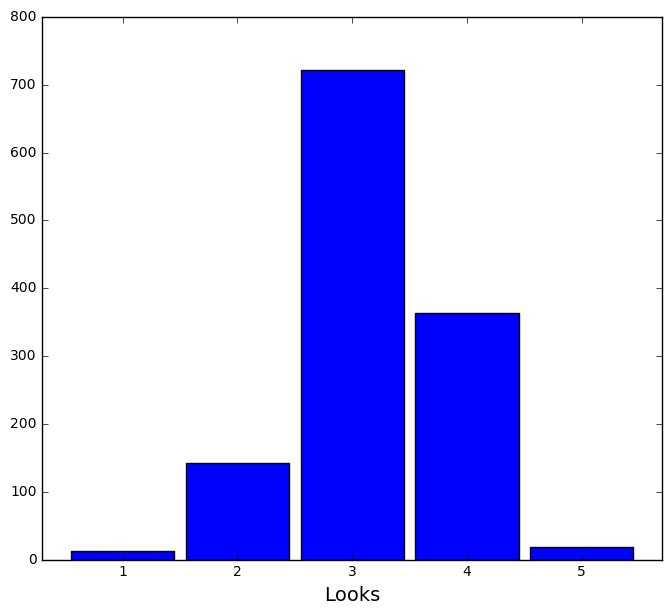

In [13]:
plt.figure(figsize(8,7))
data.groupby('looks')['looks'].agg(lambda x: len(x)).plot(kind='bar', width=0.9)
plt.xticks(rotation=0)
plt.xlabel('Looks', fontsize=14)
pylab.show()

В группах looks=1 и looks=5 слишком мало наблюдений. Превратим признак looks в категориальный и закодируем с помощью фиктивных переменных:

In [14]:
# Your code

Данные теперь:

In [15]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Построение модели

### Простейшая модель

Построим линейную модель по всем признакам.

In [ ]:
m1 = smf.ols('wage ~ exper + union + goodhlth + black + female + married +'\
                    'service + educ + belowavg + aboveavg', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

Посмотрим на распределение остатков (Q-Q график и гистграмма):

In [17]:
# Your code

### Логарифмируем отклик

In [ ]:
m2 = smf.ols('np.log(wage) ~ exper + union + goodhlth + black + female + married +'\
                            'service + educ + belowavg + aboveavg', data=data)
fitted = m2.fit()
print(fitted.summary())

Посмотрим на распределение остатков (Q-Q график и гистограмма)

In [20]:
# Your code

Посмотрим теперь на зависимость остатков от непрерывных признаков:

In [ ]:
# Your code

### Добавляем квадрат опыта работы

In [ ]:
m3 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) + union + goodhlth + black + female +'\
                            'married + service + educ + belowavg + aboveavg', data=data)
fitted = m3.fit()
print(fitted.summary())

Посмотрим на распределение остатков (Q-Q график и гистограмма) и их зависимость от непрерывных признаков

In [21]:
# Your code

Используем критерий Бройша-Пагана для проверки гомоскедастичности ошибок:

In [ ]:
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Какие выводы? ЧТо нужно попробовать сделать?

### Удаляем незначимые признаки

In [23]:
# Your code of m5 regressor

Посмотрим, не стала ли модель от удаления признаков значимо хуже, с помощью критерия Фишера:

In [ ]:
print("F=%f, p=%f, k1=%f" % m4.fit().compare_f_test(m5.fit()))

Проверим, нет ли наблюдений, которые слишком сильно влияют на регрессионное уравнение:

In [24]:
# Your code

## Выводы